In [1]:
import pandapower as pp 
import pandapower.plotting as plot
import pandas as pd
import math
import json
from pandapower.plotting.plotly import simple_plotly
import matplotlib.pyplot as plt
import os
import pandapower.networks as nw
try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]
%matplotlib inline



In [2]:
net = pp.create_empty_network() #create an empty net

In [3]:
# Loading the nodes, created in the NetworkX file: XNetwork_grid

# all nodes
nodes_orig = pd.read_csv('network_data/nodes_with_im.csv')
nodes_orig['NodeID'] = nodes_orig['NodeID'].astype(str) 

# subnetwork connection nodes
sub_con_nodes = pd.read_csv('network_data/sub_con_nodes.csv')
sub_con_nodes['NodeID'] = sub_con_nodes['NodeID'].astype(str) 

# subnetwork nodes
subnet_nodes = pd.read_csv('network_data/subnet_nodes.csv')
subnet_nodes['NodeID'] = subnet_nodes['NodeID'].astype(str) 

frames = [nodes_orig,sub_con_nodes,subnet_nodes] 
nodes_complet = pd.concat(frames)

# island grid with 2 is the mid grid
with open('network_data/grid_island.json') as json_data:
    grid_islands = json.load(json_data)
grid = pd.DataFrame.from_dict(grid_islands['2'])
grid = grid.rename(columns = {0:'NodeID'}) 

nodes_mid = nodes_complet[nodes_complet['NodeID'].isin(grid['NodeID'])].reset_index()

nodes_mid

,index,NodeID,CoordX,CoordY
0,6,42826835,554213.574000,146132.659000
1,65,42709231,554304.652000,145596.864000
2,150,42707766,554365.576000,146343.530000
3,356,42707478,554295.892000,145597.113000
4,377,42708666,554154.929000,145667.628000
5,384,42858362,554304.134000,146263.786000
6,537,42858229,554185.906000,145627.137000
7,565,42802082,553726.875000,146460.592000
8,706,42706732,554368.566000,146336.097000
9,743,42705917,554153.812000,146042.431000


In [4]:
# Nodes/busses

for i, row in nodes_mid.iterrows():
    pp.create_bus(net, name=row.NodeID, vn_kv=21, geodata = (row.CoordX,row.CoordY))

In [5]:
net.bus

,name,vn_kv,type,zone,in_service
0,42826835,21.0,b,None,True
1,42709231,21.0,b,None,True
2,42707766,21.0,b,None,True
3,42707478,21.0,b,None,True
4,42708666,21.0,b,None,True
5,42858362,21.0,b,None,True
6,42858229,21.0,b,None,True
7,42802082,21.0,b,None,True
8,42706732,21.0,b,None,True
9,42705917,21.0,b,None,True


In [6]:
# Loading the section csv for the lines

section = pd.read_csv('network_data/result_section_better.csv', header=0)

section = section[['SectionID', 'FromNodeID', 'ToNodeID']]
section['FromNodeID'] = section['FromNodeID'].astype(int)

section

,SectionID,FromNodeID,ToNodeID
0,42571222,42901266,42901267
1,42533575,42890834,42890827
2,43939209,42787380,42687308
3,43825506,42698357,42684664
4,43971553,42703621,42694044
5,94588448,52857530,94588294
6,42783662-SPOTLOAD,42783662,42783662-SPOTLOAD
7,43895417,52889602,42697592
8,42533570,42890835,42890827
9,43906026,42785340,42692978


In [7]:
cable = pd.read_csv('network_data/cable_combine.csv', header=0)

cable

,ID,R1,R0,X1,X0,B1,B0,Amps,Amps_1,Amps_2,...,ConcentricNeutralBeforeSheath,UserDefinedImpedances,Frequency,Temperature,ImpedancesNote,Favorite,Flags,Comments,SectionID,Length
0,B-G-2X95,0.2049,1.0,0.040,1.0,421.30,1.0,440.0,440.0,440.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43852184,49.0
1,B-T-95+N,0.0000,0.0,0.000,0.0,0.00,0.0,1.0,1.0,1.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43824608,60.0
2,B-TDC-6-RE,3.5639,0.0,0.100,0.0,345.58,0.0,50.0,50.0,50.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,44023328,2.0
3,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43826761,10.0
4,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43827341,23.0
5,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43826091,1.0
6,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43826021,42.0
7,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43826391,31.0
8,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43825941,38.0
9,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43825961,40.0


In [8]:
# Transformer input

transformer = pd.read_csv('network_data/transformer_combined.csv')

transformer = transformer[["SectionID" , "FromNodeID", "DeviceNumber", "KVA", "KVLLprim", "KVLLsec"]].copy()

transformer[["SectionID" , "FromNodeID", "DeviceNumber"]] = transformer[["SectionID" , "FromNodeID", "DeviceNumber"]].astype(int)
transformer[["SectionID" , "FromNodeID", "DeviceNumber"]] = transformer[["SectionID" , "FromNodeID", "DeviceNumber"]].astype(str)

transformer

,SectionID,FromNodeID,DeviceNumber,KVA,KVLLprim,KVLLsec
0,42547360,42934976,42934975,400.0,10.6,0.42
1,42571987,42905802,42905802,630.0,10.6,0.42
2,42590298,42980182,42980182,400.0,10.6,0.42
3,42552624,42878165,42882930,100.0,10.6,0.42
4,42574167,42902140,42902140,630.0,21.0,0.42
5,214551743,105470910,105470910,630.0,21.0,0.42
6,42595956,42941227,42882789,10000.0,21.0,10.60
7,42613835,42951838,42951839,630.0,21.0,0.42
8,42571862,42891069,42891068,630.0,10.6,0.42
9,42574494,42945679,42945679,630.0,21.0,0.42


In [9]:
# Only considering the section, with mid voltage given in dataframe grid and are not a transformer section

section_mid_1 = section[section['FromNodeID'].isin(grid['NodeID'])]
section_mid_2 = section[section['ToNodeID'].isin(grid['NodeID'])] 

frames = [section_mid_1,section_mid_2]
section_mid = pd.concat(frames)

section_mid = section_mid[~section_mid['SectionID'].isin(transformer['SectionID'])].reset_index()
section_mid = section_mid.applymap(str)
section_mid = section_mid[['SectionID','FromNodeID', 'ToNodeID']]
section_mid= section_mid.drop_duplicates(subset="SectionID")

section_mid_spotload = section_mid[section_mid['SectionID'].str.contains('SPOTLOAD')]
section_mid = section_mid[~section_mid['SectionID'].str.contains('SPOTLOAD')]

section_mid

,SectionID,FromNodeID,ToNodeID
0,42575388,42879302,52114128
1,42549833,42876388,52114148
2,42613833,42951835,42951834
3,42535653,42968944,42876386
4,52114130,42879301,52114128
5,52114150,42876386,52114148
6,52114140,42876385,52114138
7,42575208,42945679,42881432
8,184842391,192652303,42965808
9,184842365,184842069,192649077


In [10]:
# Combining information of cable network and cable equipment

cable['SectionID'] = cable['SectionID'].astype(str)
section_mid['SectionID'] = section_mid['SectionID'].astype(str) 

cable_section_mid = pd.merge(section_mid, cable, on='SectionID', how='inner')

cable_section_mid.drop_duplicates(subset="SectionID").reset_index()

cable_section_mid

,SectionID,FromNodeID,ToNodeID,ID,R1,R0,X1,X0,B1,B0,...,OverallDiameter,ConcentricNeutralBeforeSheath,UserDefinedImpedances,Frequency,Temperature,ImpedancesNote,Favorite,Flags,Comments,Length
0,42575388,42879302,52114128,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
1,42549833,42876388,52114148,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
2,42613833,42951835,42951834,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
3,42535653,42968944,42876386,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
4,52114130,42879301,52114128,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,1.0
5,52114150,42876386,52114148,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,1.0
6,52114140,42876385,52114138,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,1.0
7,42575208,42945679,42881432,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
8,184842391,192652303,42965808,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
9,184842365,184842069,192649077,M-FIC,0.0600,0.060,0.0990,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0


In [11]:
cable_section_mid['SectionID'] = cable_section_mid['SectionID'].astype(str)
section_mid['SectionID'] = section_mid['SectionID'].astype(str)

cable_section_mid_test = cable_section_mid[~cable_section_mid['SectionID'].isin(section_mid['SectionID'])]

cable_section_mid_test

,SectionID,FromNodeID,ToNodeID,ID,R1,R0,X1,X0,B1,B0,...,OverallDiameter,ConcentricNeutralBeforeSheath,UserDefinedImpedances,Frequency,Temperature,ImpedancesNote,Favorite,Flags,Comments,Length


In [12]:
# Cable connections with eigther low length or impendance; or connections between a node and devices as load or pv
## Will be created via switches

cable_section_low_imp = cable_section_mid[cable_section_mid['X1'] < 0.005]
cable_section_zero_length =  cable_section_mid[cable_section_mid['Length'] < 0.05]

# Deleting the special cases from the line/cable section
cable_section_mid = cable_section_mid[cable_section_mid['X1'] >= 0.005]
cable_section_mid = cable_section_mid[cable_section_mid['Length'] >= 0.05]



In [13]:
cable_section_low_imp

,SectionID,FromNodeID,ToNodeID,ID,R1,R0,X1,X0,B1,B0,...,OverallDiameter,ConcentricNeutralBeforeSheath,UserDefinedImpedances,Frequency,Temperature,ImpedancesNote,Favorite,Flags,Comments,Length


In [14]:
cable_section_zero_length


,SectionID,FromNodeID,ToNodeID,ID,R1,R0,X1,X0,B1,B0,...,OverallDiameter,ConcentricNeutralBeforeSheath,UserDefinedImpedances,Frequency,Temperature,ImpedancesNote,Favorite,Flags,Comments,Length
0,42575388,42879302,52114128,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
1,42549833,42876388,52114148,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
2,42613833,42951835,42951834,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
3,42535653,42968944,42876386,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
7,42575208,42945679,42881432,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
8,184842391,192652303,42965808,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
9,184842365,184842069,192649077,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
10,42586314,42967550,42974432,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
11,42575387,42879301,42968944,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
13,84817586,52826068,84817283,M-FIC,0.06,0.06,0.099,0.099,152.681,152.681,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0


In [15]:
# creating the lines, without low impedance and length cable

for _, hv_line in cable_section_mid.iterrows():
        from_bus = pp.get_element_index(net, "bus", hv_line.FromNodeID)
        to_bus = pp.get_element_index(net, "bus", hv_line.ToNodeID)
        pp.create_line_from_parameters(net, from_bus, to_bus, length_km=hv_line.Length/1000,
                                       r_ohm_per_km = hv_line.R1, x_ohm_per_km = hv_line.X1, 
                                       c_nf_per_km = 1000/(hv_line.B1 *math.pi*2*50) ,
                                       max_i_ka = hv_line.Amps_4/1000, name=hv_line.SectionID , parallel=1,
                                       type = "cs", df = 1)
 
        
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,max_i_ka,df,parallel,type,in_service
0,52114130,None,333,52,0.001,0.0600,0.0990,0.020848,0.668,1.0,1,cs,True
1,52114150,None,104,54,0.001,0.0600,0.0990,0.020848,0.668,1.0,1,cs,True
2,52114140,None,334,53,0.001,0.0600,0.0990,0.020848,0.668,1.0,1,cs,True
3,52869180,None,113,34,0.001,0.0600,0.0990,0.020848,0.668,1.0,1,cs,True
4,52818650,None,118,64,0.001,0.0600,0.0990,0.020848,0.668,1.0,1,cs,True
5,52818640,None,339,63,0.001,0.0600,0.0990,0.020848,0.668,1.0,1,cs,True
6,43996378,None,13,51,0.276,0.1654,0.1012,0.031572,0.460,1.0,1,cs,True
7,184842928,None,61,116,0.001,0.0600,0.0990,0.020848,0.668,1.0,1,cs,True
8,43958384,None,493,8,0.120,0.1560,0.1130,0.031288,0.414,1.0,1,cs,True
9,43959929,None,34,52,0.248,0.1560,0.1080,0.033774,0.414,1.0,1,cs,True


In [16]:
# Bus-bus switches

for _, switch_line in cable_section_zero_length.iterrows():
    from_bus = pp.get_element_index(net, "bus", switch_line.FromNodeID)
    to_bus = pp.get_element_index(net, "bus", switch_line.ToNodeID)
    pp.create_switch(net, from_bus, to_bus, et='b', closed=True, name=switch_line.SectionID)
    
for _, switch_line in cable_section_low_imp.iterrows():
    from_bus = pp.get_element_index(net, "bus", switch_line.FromNodeID)
    to_bus = pp.get_element_index(net, "bus", switch_line.ToNodeID)
    pp.create_switch(net, from_bus, to_bus, et='b', closed=True, name=switch_line.SectionID)



In [17]:
net.switch

,bus,element,et,type,closed,name
0,330,52,b,None,True,42575388
1,331,54,b,None,True,42549833
2,332,103,b,None,True,42613833
3,108,104,b,None,True,42535653
4,115,105,b,None,True,42575208
5,335,106,b,None,True,184842391
6,336,62,b,None,True,184842365
7,337,107,b,None,True,42586314
8,333,108,b,None,True,42575387
9,102,109,b,None,True,84817586


In [18]:
# load = transformer['FromNodeID']

In [19]:
for _, load in transformer.iterrows():
    bus_idx = pp.get_element_index(net, "bus", load.FromNodeID)
    pp.create_load(net, bus_idx, p_kw=38, q_kvar=6, const_z_percent=0, const_i_percent=0, 
                   name = "trafo/load "+ load.FromNodeID, scaling=1., in_service=True)
    

    
for _, load in section_mid_spotload.iterrows():
    bus_idx = pp.get_element_index(net, "bus", load.FromNodeID)
    pp.create_load(net, bus_idx, p_kw=38, q_kvar=6, const_z_percent=0, const_i_percent=0, 
                   name = "load "+ load.FromNodeID, scaling=1., in_service=True)

In [20]:
net.load

,name,bus,p_kw,q_kvar,const_z_percent,const_i_percent,sn_kva,scaling,in_service,type
0,trafo/load 42934976,226,38.0,6.0,0.0,0.0,NaN,1.0,True,None
1,trafo/load 42905802,227,38.0,6.0,0.0,0.0,NaN,1.0,True,None
2,trafo/load 42980182,228,38.0,6.0,0.0,0.0,NaN,1.0,True,None
3,trafo/load 42878165,284,38.0,6.0,0.0,0.0,NaN,1.0,True,None
4,trafo/load 42902140,257,38.0,6.0,0.0,0.0,NaN,1.0,True,None
5,trafo/load 105470910,110,38.0,6.0,0.0,0.0,NaN,1.0,True,None
6,trafo/load 42941227,454,38.0,6.0,0.0,0.0,NaN,1.0,True,None
7,trafo/load 42951838,144,38.0,6.0,0.0,0.0,NaN,1.0,True,None
8,trafo/load 42891069,415,38.0,6.0,0.0,0.0,NaN,1.0,True,None
9,trafo/load 42945679,115,38.0,6.0,0.0,0.0,NaN,1.0,True,None


In [21]:
pp.create_ext_grid(net, pp.get_element_index(net, "bus", '42879302'), vm_pu=1.03, va_degree=0, name='External grid',
                   s_sc_max_mva=10000, rx_max=0.1, rx_min=0.1) 


0

In [22]:
net.ext_grid # show external grid table

,name,bus,vm_pu,va_degree,in_service,s_sc_max_mva,rx_min,rx_max
0,External grid,330,1.03,0.0,True,10000.0,0.1,0.1


In [23]:
pp.runpp(net)

In [24]:
net.res_ext_grid

,p_kw,q_kvar
0,-1672.355301,-264.187963


In [25]:
net.res_load

,p_kw,q_kvar
0,38.0,6.0
1,38.0,6.0
2,38.0,6.0
3,38.0,6.0
4,38.0,6.0
5,38.0,6.0
6,38.0,6.0
7,38.0,6.0
8,38.0,6.0
9,38.0,6.0


In [26]:
net.res_sgen

,p_kw,q_kvar


In [27]:
net.res_bus

,vm_pu,va_degree,p_kw,q_kvar
0,1.029919,-0.002113,0.0,0.0
1,1.029746,-0.006635,0.0,0.0
2,1.029586,-0.010634,0.0,0.0
3,1.029747,-0.006593,0.0,0.0
4,1.029756,-0.006334,0.0,0.0
5,1.029863,-0.003566,0.0,0.0
6,1.029751,-0.006476,0.0,0.0
7,1.029585,-0.010694,0.0,0.0
8,1.029845,-0.004023,0.0,0.0
9,1.029830,-0.004364,0.0,0.0


In [28]:
net.res_line

,p_from_kw,q_from_kvar,p_to_kw,q_to_kvar,pl_kw,ql_kvar,i_from_ka,i_to_ka,i_ka,loading_percent
0,-1.634355e+03,-2.581885e+02,1.634355e+03,2.581891e+02,3.511046e-04,5.759652e-04,4.416538e-02,4.416538e-02,4.416538e-02,6.611584e+00
1,5.254012e+02,9.018130e+01,-5.254012e+02,-9.018125e+01,3.644438e-05,5.677581e-05,1.422915e-02,1.422915e-02,1.422915e-02,2.130113e+00
2,1.032954e+03,1.560072e+02,-1.032953e+03,-1.560070e+02,1.399572e-04,2.275719e-04,2.788440e-02,2.788440e-02,2.788440e-02,4.174311e+00
3,-3.800000e+01,-6.000000e+00,3.800000e+01,5.999997e+00,1.897981e-07,-2.564602e-06,1.026869e-03,1.026869e-03,1.026869e-03,1.537230e-01
4,-4.113548e+02,-7.215189e+01,4.113548e+02,7.215192e+01,2.237276e-05,3.403780e-05,1.114872e-02,1.114872e-02,1.114872e-02,1.668970e+00
5,3.733548e+02,6.615189e+01,-3.733548e+02,-6.615186e+01,1.844140e-05,2.755106e-05,1.012191e-02,1.012191e-02,1.012191e-02,1.515256e+00
6,9.188927e+02,1.379655e+02,-9.188084e+02,-1.379153e+02,8.425591e-02,5.027150e-02,2.480374e-02,2.480375e-02,2.480375e-02,5.392119e+00
7,1.032910e+03,1.559776e+02,-1.032910e+03,-1.559774e+02,1.399571e-04,2.280517e-04,2.788440e-02,2.788440e-02,2.788440e-02,4.174312e+00
8,-3.353351e+02,-6.014025e+01,3.353397e+02,6.014306e+01,4.645615e-03,2.813419e-03,9.095113e-03,9.095110e-03,9.095113e-03,2.196887e+00
9,-3.800000e+01,-5.999997e+00,3.800012e+01,5.998850e+00,1.223842e-04,-1.146366e-03,1.026869e-03,1.026864e-03,1.026869e-03,2.480361e-01


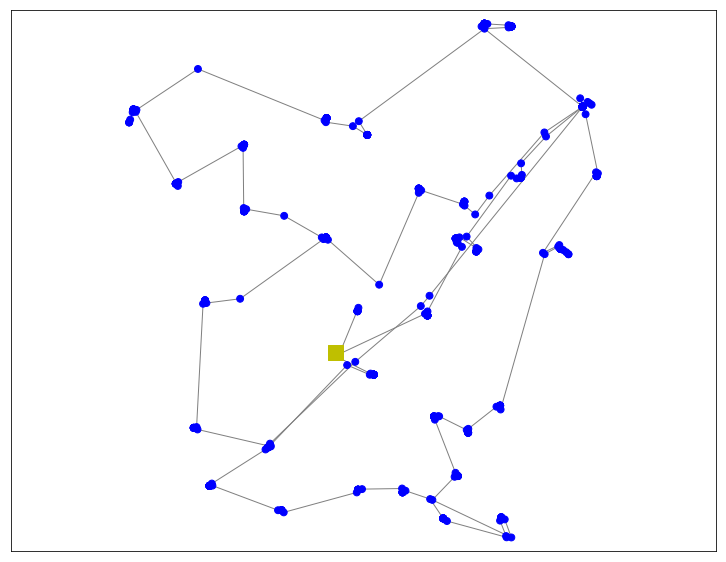

In [29]:
plot.simple_plot(net, bus_size=0.7)


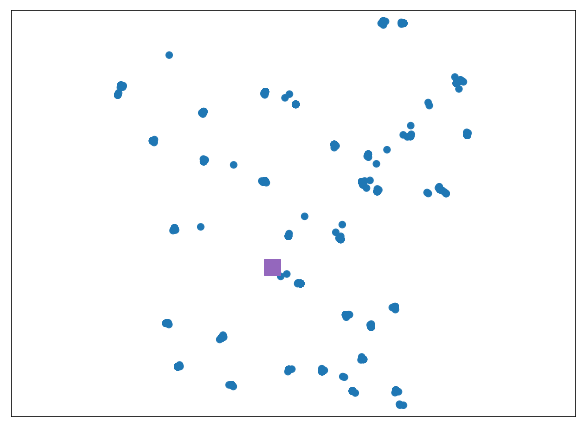

In [31]:
lc = plot.create_line_collection(net, net.line.index, color="grey", zorder=1) #create lines
bc = plot.create_bus_collection(net, net.bus.index, size=8, color=colors[0], zorder=2) #create buses
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=20, color=colors[4], zorder=11)
plot.draw_collections([lc, bc, sc], figsize=(8,6)) # plot lines and buses